# POE user analyzing project
###### **Data reference and questions are here: https://www.kaggle.com/datasets/gagazet/path-of-exile-league-statistic**

---
Hi, I'm Angela. 😊 I'm a novice in data analysis. I'm interested in the video games, mobility, culture, and content industry. I hope to become a data scientist with anomaly detection and anti-cheating. And I hope that my analysis will have a positive impact on the world at least a little bit.  
This is my first Kaggle-data analyzing project on my own. I played with this data for almost a month or more freely, and I finish it to start to answer these questions partially. Finally, I can close the analysis joyfully.  
I analyzed this data set with my thoughts and what I learned (as if I were a game analyst 😆).  

_ps. English may seem a little awkward, I'm sorry. And I used the word 'average' more than the word 'mean' because I wanted to communicate more clearly in my hectic writing. 'mean' is so mean to 'average', 'mean' means 'mean' and... just joking._ 🤪

---
##### **Questions for participants**

1. A total number of players in each division, usage of each class in descending order.
2. Some of the players streaming their game (twitch column). Do they play better than people, who does not?
3. Predict chance to be at top 30 in each division, if we are Necromancer. With and without stream.
4. Average number of finished challanges for each division, show division with highest and lowest average challanges.
5. Show dependency between level and class of died characters. Only for HC divisions.


## Importin Data and Libraries
---

In [1]:
import pandas as pd
import numpy as np

import time as time
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

np.random.seed(0)
tf.random.set_seed(0)

# version check
print(sns.__version__)
print(pd.__version__)
print(np.__version__)
print(tf.__version__)
print(keras.__version__)

data = pd.read_csv("poe_stats.csv")

0.11.2
1.4.1
1.22.4
2.9.1
2.9.0


In [2]:
df = data
df.head(10)

,rank,dead,online,name,level,class,id,experience,account,challenges,twitch,ladder
0,1,False,False,Tzn_NecroIsFineNow,100,Necromancer,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,4250334444,TheTzn,40,thetzn,Harbinger
1,1,False,False,RaizNeverFirstQT,100,Necromancer,8f3216db5ac9106c287a834731aafc83c387138f28fc45...,4250334444,RaizQT,22,raizqt,SSF Harbinger HC
2,1,False,False,GucciStreamerAdvantage,100,Necromancer,c6ec2dae3855c551e0597c06ef2da06fbb5512487ded7f...,4250334444,GucciPradas,35,guccipradas,Hardcore Harbinger
3,1,False,False,ChiroxPrime,100,Slayer,c861372da792be0b22c45bf437ccd58437c52e9455e0bf...,4250334444,Chiroxun,26,NaN,SSF Harbinger
4,2,False,False,Cool_NecroIsFineNow,100,Deadeye,24ae924ceed7989ef3d3d6772612832bb467a6094352c7...,4250334444,cooltail,22,NaN,Harbinger
5,2,False,False,SteelStreamerAdvantage,100,Deadeye,51acb8e6fac3cfaa7ff848151dad01b0a6f350e7525543...,4250334444,Steelmage,37,steelmage202,Hardcore Harbinger
6,2,False,False,Grom_WhyGodThreeCmWhy,100,Gladiator,5d8b80b2bdd30f3dba1036a6791187562758935e8d4723...,4250334444,rocklegend,22,gromick,SSF Harbinger HC
7,2,False,False,beobio_capitan,100,Inquisitor,65c58f9b186e1fbe9f927484f3f178cdb9ee0dc2427289...,4250334444,TishaVosemsot,40,beobio,SSF Harbinger
8,3,False,False,Rami_The_Negromaniac,100,Necromancer,00c0030fc548cc4c0d804564f8fb356610044b7e6d484f...,4250334444,rami1337,40,rami1337,Harbinger
9,3,False,False,FutonBlewAway,100,Raider,46e56572ff6e403f45fac597240e13e9af225f06ca4e52...,4250334444,pleaGRC,40,NaN,SSF Harbinger


## Data summary

In [3]:
# options about float

pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,rank,level,experience,challenges
count,"59,776.00","59,776.00","59,776.00","59,776.00"
mean,"7,495.37",85.42,"1,825,786,027.36",25.76
std,"4,330.18",11.29,"1,094,747,934.61",8.44
min,1.00,53.00,"77,909,816.00",4.00
25%,"3,745.00",78.00,"777,469,746.25",19.00
50%,"7,492.00",90.00,"1,934,009,687.00",25.00
75%,"11,247.00",95.00,"2,876,116,901.00",33.00
max,"15,000.00",100.00,"4,250,334,444.00",40.00


In [4]:
df.describe(include = 'object')

,name,class,id,account,twitch,ladder
count,59776,59776,59776,59776,16300,59776
unique,58286,26,59776,37123,9613,4
top,_Flic_,Berserker,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,chuz101,thespunkylobster,SSF Harbinger
freq,14,8711,1,30,18,14981


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59776 entries, 0 to 59775
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        59776 non-null  int64 
 1   dead        59776 non-null  bool  
 2   online      59776 non-null  bool  
 3   name        59776 non-null  object
 4   level       59776 non-null  int64 
 5   class       59776 non-null  object
 6   id          59776 non-null  object
 7   experience  59776 non-null  int64 
 8   account     59776 non-null  object
 9   challenges  59776 non-null  int64 
 10  twitch      16300 non-null  object
 11  ladder      59776 non-null  object
dtypes: bool(2), int64(4), object(6)
memory usage: 4.7+ MB


I thought deeply about the question. _Does 'Show dependency ~' this phrase already suppose that the level and class have a dependency on each other before analyzing so far?_  
So I tried to judge by some statistical methods whether they have a dependency. Then I explained(showed) it using logic about the game and stat results.  


If I were a game data analyst, after a little more deeply thinking about this question, I would understand this question as the relation between the dead characters' class and the level. 
And I assumed that the intention of it is searching for some reason why the dead characters are dead. Maybe it is digging into only Hardcore modes to solve a problem in limited data. Because this data is limiting for analyzing the in-game situations(like losing HP or environment) or boundless combinations of skill/equipment.  


Someone can think that the death is related to just level(user's ability), maybe the class is the problem or both. But death is just 'the death' and it could be related to just one of them or neither, we have to be beware when analyzing a problem kind of this.  
For example, even if there's a relation between them, it is possible that the relationship is caused by the difficulty of piloting the class, regardless of the class's performance(because the data is only already ended games.).  

If there is a correlation between level and class in dead characters, we can start to look for something that could reveal the end(death) of the characters by analyzing relativeness with level or class.  
On the other hand, if there's no or low dependency between level and class, we can only know that the preference by level about the classes in HC mode(especially for dead characters) doesn't exist.  


---
The methods which can get the dependency,  
    1. getting a correlation between level and class.  
    2. comparing the average level by each class and one-way ANOVA

And I imagined also this: make a machine learning model with class and level, and watch whether the model can predict the class just with level! I'm a little bit sorry for the computer but the computer can't do that.

### ratio of dead characters

In [6]:
# dataframe contains only hardcore modes
df_hc = df.loc[df['ladder'].isin(['SSF Harbinger HC', 'Hardcore Harbinger'])]

# dead characters data frame with the level data
df_dead = df_hc.loc[df['dead'] == True][['class', 'level']]

# dead characters rate
df_hc.pivot_table(index = 'ladder', values = 'dead')

,dead
ladder,
Hardcore Harbinger,0.63
SSF Harbinger HC,0.74


### level distribution in Hardcore mode

In [7]:
df_dead['level'].describe()

count   20,581.00
mean        80.23
std         13.03
min         53.00
25%         69.00
50%         88.00
75%         91.00
max        100.00
Name: level, dtype: float64

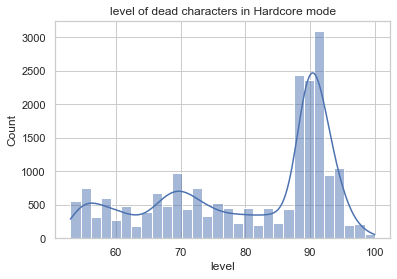

In [84]:
plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (6, 4)
sns.set_theme(style = 'whitegrid')

sns.histplot(x = df_dead['level'], palette = 'Paired', kde = True)
plt.title("level of dead characters in Hardcore mode")
plt.show()

### Average level of dead characters

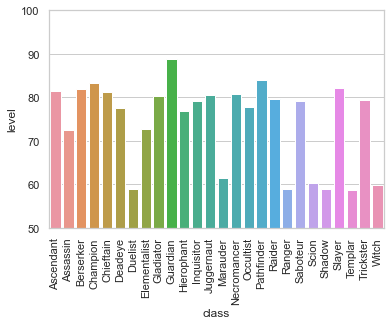

In [85]:
plt.rcParams['figure.figsize'] = (6, 4)
plt.xticks(rotation = 90)
plt.ylim(50, 100)
df_hc_lev_mean = df_dead.groupby('class')[['level']].mean()
sns.barplot(data = df_hc_lev_mean, x = df_hc_lev_mean.index, y = 'level')
plt.show()

### About the average graph, and the important point: Ascendancy Classes and Pre-Ascendancy Classes

As [Path Of Exile Official documents](https://www.pathofexile.com/ascendancy/classes), _" Upon completing the Lord's Labyrinth for the first time, you can pick an Ascendancy class from one of the three available for your class. The first time you complete the Labyrinth on each difficulty, you will receive two Ascendancy Points for its skill tree."_. 

As you know, 'Duelist', 'Marauder', 'Ranger', 'Scion', 'Templar', and 'Witch' are _root classes(I named)_ of 19 _ascendancy classes_. I tried setting the skill trees for this part on the official homepage, and I found it has high degrees of freedom.  
This means it makes sense that the 293 _root class characters_ in this ranking list have a lower average. They just didn't finish the Labyrinth. Their level will be higher than this when they finish the Labyrinth and be the ascendancy classes.  
Of course, they are indeed excellent at playing POE because they rank with other _ascendancy classes_. But we must keep in view that their level(53 level and the class) is "by their will or not". The probability of a case that some aces play the game with _root classes_ for fun or desire. And it would be that some aces play the game without the "two Ascendancy Points" for a challenging challenge.  

I planned to analyze regardless of _root classes_ first. But in my opinion, the result is too ambiguous and useless in my book.  
So, I looked at the mean and standard deviation of _root classes_ and _ascendancy classes_. And comparing all classes without _root classes_.  

In [89]:
# 'root classes'
rootclasses = ['Duelist', 'Marauder', 'Ranger', 'Scion', 'Shadow', 'Templar', 'Witch']

# division01: not 'Ascending Classes'
print(df_dead.loc[df_dead['class'].isin(rootclasses)].describe())

# division02: 'Ascending Classes'
print(df_dead.loc[~df_dead['class'].isin(rootclasses)].describe())

          level
count  321.0000
mean    59.7850
std      6.4431
min     53.0000
25%     55.0000
50%     58.0000
75%     63.0000
max     89.0000
            level
count  20260.0000
mean      80.5529
std       12.8477
min       53.0000
25%       70.0000
50%       89.0000
75%       91.0000
max      100.0000


#### What we know from the graph

##### The average level of Duelist, Marauder, Ranger, Scion, Templar and Witch is markedly small.  
 As we already know, they're _not 'Ascending Classes'_(I'll call them _'root classes'_). So I divided the analysis among all classes and the classes in the Lord's Labyrinth('ascending Classes').

To add to the explanation, it probably has differences between all of these classes. Perhaps if we do ANOVA with all of these classes, it will be different, and if we do all the post-hoc comparison results, we will see a difference in these classes(especially with root classes).

In other words, some classes' level is indeed lower, strictly speaking, but we don't think that means exactly the level correlates with the class.  
Because it seems Hardcore modes had a constraint on the level to enter the mode, and the minimum level for who could play Hardcore modes is inferred 53.

_From the perspective of gamers, if we think a little more, we could notice that the case would be there considerably much that already experienced users won a high rank with a fresh character for some reason.  
(And when their class is matched with popular classes... The possibility that this scenario would be right is high.)_   

We have to prove the fact so I did an ANOVA test. \ (^0^\ ) =33

## 5-1. correlation from one-hot encoding data and heatmap
It's an extreme measure when want to see the correlation.  

I wanna see the results together if there're relations between some classes.

---
### 5-1-1. correlation (all classes)
Get correlation matrix and heatmap with dummied classes columns.

#### get dummies

In [11]:
df_deads_allonehot = pd.get_dummies(df_dead, drop_first = False)
df_deads_allonehot.head(5)

,level,class_Ascendant,class_Assassin,class_Berserker,class_Champion,class_Chieftain,class_Deadeye,class_Duelist,class_Elementalist,class_Gladiator,...,class_Pathfinder,class_Raider,class_Ranger,class_Saboteur,class_Scion,class_Shadow,class_Slayer,class_Templar,class_Trickster,class_Witch
15,100,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
24,100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
48,100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,99,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_deads_allonehot.corr().round(3)

,level,class_Ascendant,class_Assassin,class_Berserker,class_Champion,class_Chieftain,class_Deadeye,class_Duelist,class_Elementalist,class_Gladiator,...,class_Pathfinder,class_Raider,class_Ranger,class_Saboteur,class_Scion,class_Shadow,class_Slayer,class_Templar,class_Trickster,class_Witch
level,1.00,0.03,-0.06,0.05,0.04,0.02,-0.02,-0.08,-0.09,0.01,...,0.04,-0.01,-0.05,-0.01,-0.06,-0.06,0.04,-0.08,-0.02,-0.10
class_Ascendant,0.03,1.00,-0.03,-0.10,-0.04,-0.06,-0.03,-0.01,-0.04,-0.09,...,-0.04,-0.07,-0.01,-0.04,-0.01,-0.01,-0.08,-0.01,-0.07,-0.02
class_Assassin,-0.06,-0.03,1.00,-0.04,-0.02,-0.02,-0.01,-0.01,-0.02,-0.04,...,-0.01,-0.03,-0.00,-0.02,-0.00,-0.00,-0.03,-0.01,-0.03,-0.01
class_Berserker,0.05,-0.10,-0.04,1.00,-0.06,-0.08,-0.04,-0.02,-0.06,-0.13,...,-0.05,-0.10,-0.01,-0.06,-0.01,-0.01,-0.12,-0.02,-0.10,-0.02
class_Champion,0.04,-0.04,-0.02,-0.06,1.00,-0.03,-0.02,-0.01,-0.02,-0.05,...,-0.02,-0.04,-0.01,-0.03,-0.01,-0.01,-0.05,-0.01,-0.04,-0.01
class_Chieftain,0.02,-0.06,-0.02,-0.08,-0.03,1.00,-0.03,-0.01,-0.03,-0.07,...,-0.03,-0.05,-0.01,-0.03,-0.01,-0.01,-0.07,-0.01,-0.06,-0.01
class_Deadeye,-0.02,-0.03,-0.01,-0.04,-0.02,-0.03,1.00,-0.01,-0.02,-0.04,...,-0.02,-0.03,-0.00,-0.02,-0.01,-0.00,-0.04,-0.01,-0.03,-0.01
class_Duelist,-0.08,-0.01,-0.01,-0.02,-0.01,-0.01,-0.01,1.00,-0.01,-0.02,...,-0.01,-0.01,-0.00,-0.01,-0.00,-0.00,-0.01,-0.00,-0.01,-0.00
class_Elementalist,-0.09,-0.04,-0.02,-0.06,-0.02,-0.03,-0.02,-0.01,1.00,-0.05,...,-0.02,-0.04,-0.01,-0.02,-0.01,-0.01,-0.05,-0.01,-0.04,-0.01
class_Gladiator,0.01,-0.09,-0.04,-0.13,-0.05,-0.07,-0.04,-0.02,-0.05,1.00,...,-0.05,-0.08,-0.01,-0.05,-0.01,-0.01,-0.10,-0.02,-0.09,-0.02


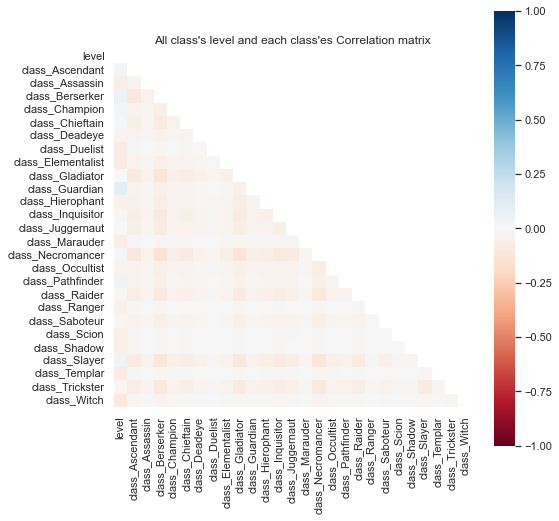

In [87]:
mask = np.zeros_like(df_deads_allonehot.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (8, 8))

# 'O' mark: checking values which over significance level(0.05)
for i in range(df_deads_allonehot.corr().shape[1]):
    for j in range(df_deads_allonehot.corr().shape[0]):
        if (abs(df_deads_allonehot.corr().iat[i, j]) > 0.2) and (i<j) :
            plt.text(i+0.5, j+0.5, 'O', ha='center', va='center')

sns.heatmap(data = df_deads_allonehot.corr(), cmap = 'RdBu', mask=mask, square = True, vmin = -1, vmax = 1)
plt.title('All class\'s level and each class\'es Correlation matrix')
plt.show()

---
### 5-1-2. correlation (without _root classes_)

In [14]:
df_deads_aconehot = pd.get_dummies(df_dead.loc[~df_dead['class'].isin(rootclasses)], drop_first = False)
df_deads_aconehot.head(5)

,level,class_Ascendant,class_Assassin,class_Berserker,class_Champion,class_Chieftain,class_Deadeye,class_Elementalist,class_Gladiator,class_Guardian,class_Hierophant,class_Inquisitor,class_Juggernaut,class_Necromancer,class_Occultist,class_Pathfinder,class_Raider,class_Saboteur,class_Slayer,class_Trickster
15,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
24,100,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
32,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
48,100,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
77,99,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


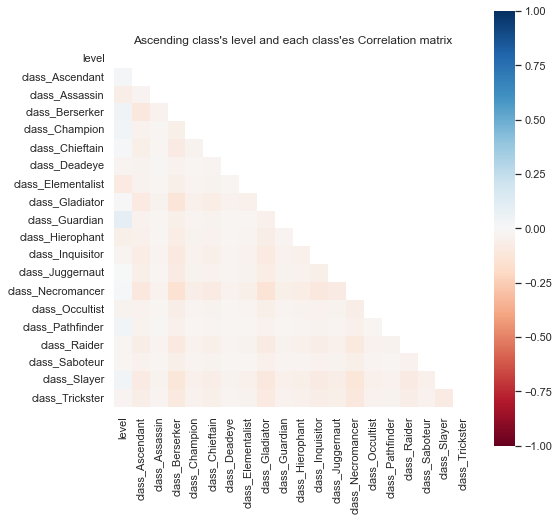

In [90]:
mask = np.zeros_like(df_deads_aconehot.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (8, 8))

# 'O' mark: checking values which over significance level(0.05)
for i in range(df_deads_aconehot.corr().shape[1]):
    for j in range(df_deads_aconehot.corr().shape[0]):
        if (abs(df_deads_aconehot.corr().iat[i, j]) > 0.2) and (i<j) :
            plt.text(i+0.5, j+0.5, 'O', ha='center', va='center')

sns.heatmap(data = df_deads_aconehot.corr(), cmap = 'RdBu', mask=mask, square = True, vmin = -1, vmax = 1)
plt.title('Ascending class\'s level and each class\'es Correlation matrix')
plt.show()

### result1:
I marked with 'O' which values' absolute value is over 0.2, but there's not a mark anywhere.  

After getting dummies, the data indeed became scarce data.  
And this method can't draw a markable correlation between the level and the class even if they have.

## 5-2. ANOVA test
---
### 5-2-1. ANOVA test (all classes)

#### 5-2-1-1.  Average level

In [16]:
df_dead.groupby('class')[['level']].describe()

level                                           
                count  mean   std   min   25%   50%   75%    max
class                                                           
Ascendant    1,380.00 81.55 12.80 53.00 71.00 89.00 91.00 100.00
Assassin       225.00 72.40 13.38 53.00 59.00 71.00 88.00  94.00
Berserker    2,621.00 81.91 12.15 53.00 72.00 89.00 91.00 100.00
Champion       509.00 83.22 11.31 53.00 75.00 89.00 91.00  99.00
Chieftain      913.00 81.35 12.20 53.00 70.00 89.00 91.00  99.00
Deadeye        269.00 77.47 14.66 53.00 62.00 83.00 90.00  98.00
Duelist         49.00 58.98  5.27 53.00 55.00 57.00 62.00  71.00
Elementalist   442.00 72.78 13.31 53.00 60.00 71.00 89.00 100.00
Gladiator    2,097.00 80.44 12.78 53.00 70.00 87.00 91.00 100.00
Guardian       448.00 88.85  9.67 53.00 90.00 91.00 94.00 100.00
Hierophant     755.00 76.89 12.50 53.00 67.00 76.00 89.00  98.00
Inquisitor   1,306.00 79.10 12.95 53.00 68.00 84.00 90.00 100.00
Juggernaut     881.00 80.64 12.29 53.00 70.00 86.00 91.00  99.00
Marauder        60.00 61.55  7.42 53.00 55.00 60.00 66.50  83.00
Necromancer  2,712.00 80.91 12.74 53.00 70.00 88.50 91.00 100.00
Occultist      523.00 77.80 13.63 53.00 67.00 79.00 90.50 100.00
Pathfinder     373.00 84.02 12.91 53.00 76.00 90.00 92.00  98.00
Raider       1,216.00 79.54 13.77 53.00 68.00 89.00 91.00 100.00
Ranger          22.00 58.91  5.04 53.00 55.25 57.50 60.75  70.00
Saboteur       483.00 79.11 13.29 53.00 68.00 84.00 91.00 100.00
Scion           32.00 60.34  7.82 53.00 55.75 58.00 62.25  89.00
Shadow          28.00 59.04  4.98 53.00 55.00 57.50 62.00  73.00
Slayer       1,825.00 82.11 11.94 53.00 72.00 89.00 91.00 100.00
Templar         52.00 58.73  4.97 53.00 54.00 58.00 61.25  71.00
Trickster    1,282.00 79.35 12.83 53.00 69.00 84.00 90.00 100.00
Witch           78.00 59.92  7.23 53.00 54.00 58.00 63.75  88.00

#### 5-2-1-2. Boxplot by class
Get a boxplot and compare their average. 

In [17]:
# data division : make a each classes array for repeatation
df_dead.sort_values(['class'], inplace = True)
list_class = df_dead['class'].unique()

# list_level = []
for c in list_class:
    condition = (df_dead['class'] == c)
    df_bin = df_dead.loc[condition]
    globals()["ar_{}".format(c)] = np.array(df_bin['level'])
#     list_level.append(globals()["ar_{}".format(c)])

# make a variate list: Actually, this can't function...
# so we make a list composed of the above variable based on this list
list_level = []
for c in list_class:
    d = 'ar_' + c
    list_level.append(d)

In [18]:
list_level = [ar_Ascendant, ar_Assassin, ar_Berserker, ar_Champion, ar_Chieftain, ar_Deadeye, ar_Duelist, ar_Elementalist, ar_Gladiator, ar_Guardian, ar_Hierophant, ar_Inquisitor, ar_Juggernaut, ar_Marauder, ar_Necromancer, ar_Occultist, ar_Pathfinder, ar_Raider, ar_Ranger, ar_Saboteur, ar_Scion, ar_Shadow, ar_Slayer, ar_Templar, ar_Trickster, ar_Witch]

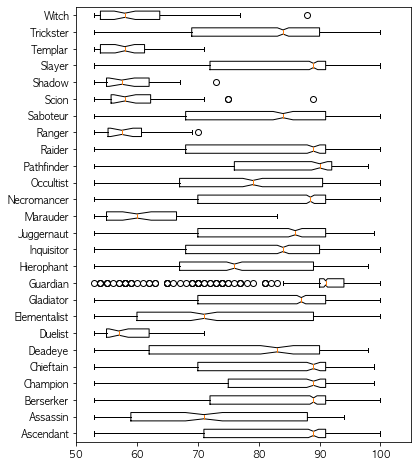

In [19]:
plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (6, 8)
plt.boxplot([ar_Ascendant, ar_Assassin, ar_Berserker, ar_Champion, ar_Chieftain, 
             ar_Deadeye, ar_Duelist, ar_Elementalist, ar_Gladiator, ar_Guardian, 
             ar_Hierophant, ar_Inquisitor, ar_Juggernaut, ar_Marauder, ar_Necromancer, 
             ar_Occultist, ar_Pathfinder, ar_Raider, ar_Ranger, ar_Saboteur, 
             ar_Scion, ar_Shadow, ar_Slayer, ar_Templar, ar_Trickster, 
             ar_Witch], notch = True, vert=False)
plt.xlim(50, 105)
plt.yticks(range(1, len(list_level)+1), list_class)
plt.show()

#### box plot result

One box's $Q_1$ is bigger than the other's $Q_3$, it has a difference between them without further discussion.  
And it really does, some classes whose average level is lower than others are smaller than others $Q_3$. 

#### 5-2-1-3. ANOVA

#### (1) Normality and skewness test: Shapiro-wilk test 

Some class has samples under 30(Ranger, Shadow), so I choose the Shapiro-wilk test.

In [20]:
from scipy.stats import *
for cl, array in zip(list_class, list_level):
    print("# == {} Shapiro-wilk test ==".format(cl))
    print(shapiro(array))
    print("Skewness: {}".format(abs(stats.skew(array, bias = False))))
    if shapiro(array)[1] > 0.05:
        print("> Normality satisfied")
    if abs(stats.skew(array, bias = False)) > 2:
        print("> Skewness is over")
    print('\n')

# == Ascendant Shapiro-wilk test ==
ShapiroResult(statistic=0.8464069366455078, pvalue=1.406005808364913e-34)
Skewness: 0.7893670910990486


# == Assassin Shapiro-wilk test ==
ShapiroResult(statistic=0.9036740064620972, pvalue=7.442096938703457e-11)
Skewness: 0.12445145034207133


# == Berserker Shapiro-wilk test ==
ShapiroResult(statistic=0.8378379344940186, pvalue=1.401298464324817e-45)
Skewness: 0.9156226298067661


# == Champion Shapiro-wilk test ==
ShapiroResult(statistic=0.8304262161254883, pvalue=7.788036228770405e-23)
Skewness: 1.09535600328427


# == Chieftain Shapiro-wilk test ==
ShapiroResult(statistic=0.8603966236114502, pvalue=1.0740052335092418e-27)
Skewness: 0.7549078959756601


# == Deadeye Shapiro-wilk test ==
ShapiroResult(statistic=0.8607589602470398, pvalue=7.343571517754496e-15)
Skewness: 0.3566468145186242


# == Duelist Shapiro-wilk test ==
ShapiroResult(statistic=0.8795055150985718, pvalue=0.0001255940442206338)
Skewness: 0.8906833141117315


# == Elementalist S

/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_65008/3998002070.py:5: DeprecationWarning: Please use `skew` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  print("Skewness: {}".format(abs(stats.skew(array, bias = False))))
/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_65008/3998002070.py:8: DeprecationWarning: Please use `skew` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  if abs(stats.skew(array, bias = False)) > 2:


#### Normality test results
There was no class satisfying normality. But many classes have enough samples to assume the central limit theorem, so I kept going with the equal-variance test. 

- Plus: Only `Scion` and `Guardian` 's skewness is over 2, and we can remind that the classes are _root classes_.


#### (2) Equal-Variance test

I tested by two test methods, Levene and Fligner-Killeen.  
- Bartlett test which is a popular method must be normality in data, 
- Levene test is less sensitive to normality.   
- and Fligner-Killeen test, it is said that some nonparametric tests do not correlate with the size or probability distribution of the sample.  

In [21]:
levene(ar_Ascendant, ar_Assassin, ar_Berserker, ar_Champion, ar_Chieftain, ar_Deadeye, ar_Duelist, ar_Elementalist, ar_Gladiator, ar_Guardian, ar_Hierophant, ar_Inquisitor, ar_Juggernaut, ar_Marauder, ar_Necromancer, ar_Occultist, ar_Pathfinder, ar_Raider, ar_Ranger, ar_Saboteur, ar_Scion, ar_Shadow, ar_Slayer, ar_Templar, ar_Trickster, ar_Witch)

LeveneResult(statistic=18.631784427117147, pvalue=9.597742330362986e-82)

In [22]:
fligner(ar_Ascendant, ar_Assassin, ar_Berserker, ar_Champion, ar_Chieftain, ar_Deadeye, ar_Duelist, ar_Elementalist, ar_Gladiator, ar_Guardian, ar_Hierophant, ar_Inquisitor, ar_Juggernaut, ar_Marauder, ar_Necromancer, ar_Occultist, ar_Pathfinder, ar_Raider, ar_Ranger, ar_Saboteur, ar_Scion, ar_Shadow, ar_Slayer, ar_Templar, ar_Trickster, ar_Witch)

FlignerResult(statistic=535.175634847063, pvalue=3.8612549948345704e-97)

#### Equal-Variance test results

All class's data satisfied equal variances.

#### (3) One-way ANOVA 


In [23]:
f_oneway(ar_Ascendant, ar_Assassin, ar_Berserker, ar_Champion, ar_Chieftain, ar_Deadeye, ar_Duelist, ar_Elementalist, ar_Gladiator, ar_Guardian, ar_Hierophant, ar_Inquisitor, ar_Juggernaut, ar_Marauder, ar_Necromancer, ar_Occultist, ar_Pathfinder, ar_Raider, ar_Ranger, ar_Saboteur, ar_Scion, ar_Shadow, ar_Slayer, ar_Templar, ar_Trickster, ar_Witch)

F_onewayResult(statistic=63.98606057045286, pvalue=2.38182378124225e-310)

#### One-way ANOVA results
The p-value is under 0.05 and it could be said that there're differences between all class levels.  

And the level data didn't satisfy normality, so I added the non-parametric test, the Kruskal-Wallis H test.  

#### (4) Kruskal-Wallis H test

In [24]:
kruskal(ar_Ascendant, ar_Assassin, ar_Berserker, ar_Champion, ar_Chieftain, ar_Deadeye, ar_Duelist, ar_Elementalist, ar_Gladiator, ar_Guardian, ar_Hierophant, ar_Inquisitor, ar_Juggernaut, ar_Marauder, ar_Necromancer, ar_Occultist, ar_Pathfinder, ar_Raider, ar_Ranger, ar_Saboteur, ar_Scion, ar_Shadow, ar_Slayer, ar_Templar, ar_Trickster, ar_Witch)

KruskalResult(statistic=1376.5361867441661, pvalue=3.928809290642803e-275)

#### Kruskal_Wallis H test results

The p-value is also under 0.05 in this method and it could be said that there're differences between all class levels.  

(We already know, but) Let's uncover what classes are different from other classes.  

#### (5) Post-hoc 1 : Bonferroni

The number of samples is different in each class, so I choose Bonferroni's test and Scheffe's test.  

This is because it can be used in both parametric and non-parametric methods, and can be used even if the number of samples is different.  

However, the more comparison groups, the weaker the power in Bonferroni's, so a strict method of the Scheffe test will also be added next.

In [25]:
from statsmodels.sandbox.stats.multicomp import MultiComparison
comp = MultiComparison(df_dead['level'], df_dead['class'])
tb1, a1, a2 = comp.allpairtest(stats.ttest_ind, method = 'bonf')
type(tb1)

/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_65008/4034465408.py:3: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  tb1, a1, a2 = comp.allpairtest(stats.ttest_ind, method = 'bonf')


statsmodels.iolib.table.SimpleTable

_This tb1 is too long to show in this, so I wanted to show reject 'TRUE' rows but I couldn't find simple solutions.  
So I saved these results and reloaded them on this notebook. Check this._

In [26]:
# save the `statsmodels.iolib.table.SimpleTable` type result to csv
with open('/Users/Angela/Desktop/Personal/toy3_POE_kaggle/tb1.csv','w') as fh:
    fh.write(tb1.as_csv())

# call the info of the results, 3 lines.
fh2 = open('/Users/Angela/Desktop/Personal/toy3_POE_kaggle/tb1.csv', 'r')
for i in range(3):
    line = fh2.readline()
    print(line)
    pass
fh2.close()

# load the data from csv file, except the result info lines.
# the columns have 'space' because of the table form previous itself
df_bonftmp = pd.read_csv("tb1.csv", header = 3)
df_bonftmp.columns = columns = ['group1', 'group2', 'stat', 'pval', 'pval_corr', 'reject']

# reject column data is object type including 'Mysterious space'.
# array(['True  ', 'False '], dtype=object)
# correct the data to 1 or 0
df_bonftmp.loc[df_bonftmp['reject']=='True  ', 'reject'] = 1
df_bonftmp.loc[df_bonftmp['reject']=='False ', 'reject'] = 0

# and group1 and group2 columns have 'Mysterious Space Format' too, so edit it.
df_bonftmp['group1'] = df_bonftmp['group1'].str.replace(" ", "")
df_bonftmp['group2'] = df_bonftmp['group2'].str.replace(" ", "")

Test Multiple Comparison ttest_ind 

FWER=0.05 method=bonf

alphacSidak=0.00, alphacBonf=0.000



In [27]:
# check the reject 'True' and descending order the p-value
# (p-value < 0.05, the average difference has meaning.)
df_bonftmp.loc[df_bonftmp['reject']==1].sort_values('pval', ascending = False).head(10)

,group1,group2,stat,pval,pval_corr,reject
236,Juggernaut,Occultist,4.02,0.00,0.02,1
16,Ascendant,Raider,3.85,0.00,0.04,1
54,Berserker,Gladiator,4.03,0.00,0.02,1
28,Assassin,Deadeye,-3.98,0.00,0.03,1
82,Champion,Necromancer,3.82,0.00,0.04,1
80,Champion,Juggernaut,3.88,0.00,0.04,1
202,Guardian,Templar,22.11,0.00,0.00,1
203,Guardian,Trickster,14.30,0.00,0.00,1
204,Guardian,Witch,25.21,0.00,0.00,1
206,Hierophant,Juggernaut,-6.10,0.00,0.00,1


In [28]:
rootclasses = ['Duelist', 'Marauder', 'Ranger', 'Scion', 'Shadow', 'Templar', 'Witch']
root_ratio = df_bonftmp.loc[(df_bonftmp['group1'].isin(rootclasses))|
                            (df_bonftmp['group2'].isin(rootclasses))]
root_ratio['reject'].mean()

0.8636363636363636

In [29]:
asce_ratio = df_bonftmp.loc[~((df_bonftmp['group1'].isin(rootclasses))|
                            (df_bonftmp['group2'].isin(rootclasses)))]
asce_ratio['reject'].mean()

0.6198830409356725

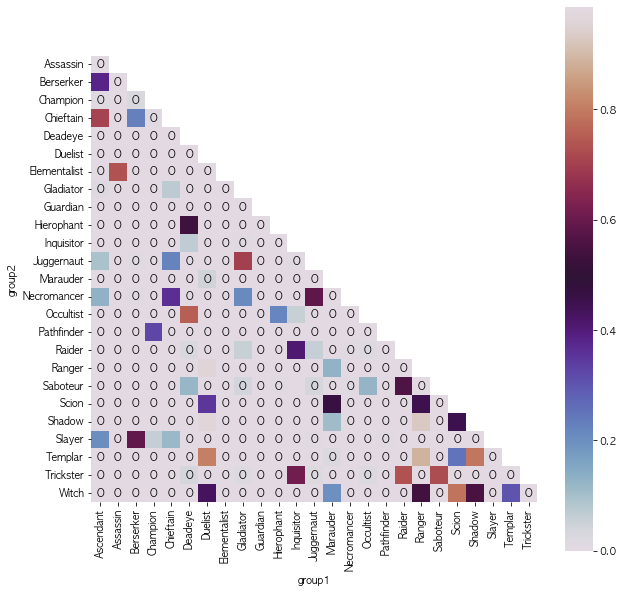

In [30]:
# Bonferroni's test
df_bonfheat = df_bonftmp.pivot_table(values = 'pval', 
                                     index = 'group1', columns = 'group2').T
# # It doesn't need to mask (np.nan are already there)
# mask = np.zeros_like(df_sche)
# mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (10, 10))

# 'O' mark: checking values which over significance level(0.05)
for i in range(df_bonfheat.shape[1]):
    for j in range(df_bonfheat.shape[0]):
        if (df_bonfheat.iat[j, i] < 0.05):
            plt.text(i+0.5, j+0.5, 'O', ha='center', va='center')

sns.heatmap(data = df_bonfheat, cmap = 'twilight', square = True)
plt.show()

#### Bonferroni test results:
- The `reject` result is difficult to explain easily because it is too large to compare the two of them.  

- And I compared the reject ratio between when the class is 'root classes' and 'ascendancy classes'. (Among the two ratios, if one has a different markedly, thinking by dividing 'root class' and 'ascendancy class' is valid.)  
    The gap between the two reject ratios isn't little.  
    This clearly shows that it can be useful to think of _root class_ and _ascending class_ separately.  

#### (6) Post-hoc 2 : Scheffe 

In [31]:
import scikit_posthocs as sp
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{: .4f}'.format)
df_sche = sp.posthoc_scheffe(df_dead, val_col = 'level', group_col = 'class')
df_sche

,Ascendant,Assassin,Berserker,Champion,Chieftain,Deadeye,Duelist,Elementalist,Gladiator,Guardian,Hierophant,Inquisitor,Juggernaut,Marauder,Necromancer,Occultist,Pathfinder,Raider,Ranger,Saboteur,Scion,Shadow,Slayer,Templar,Trickster,Witch
Ascendant,1.0000,0.0000,1.0000,0.9999,1.0000,0.5355,0.0000,0.0000,0.9999,0.0000,0.0000,0.4310,1.0000,0.0000,1.0000,0.1122,0.9908,0.8966,0.0000,0.9698,0.0000,0.0000,1.0000,0.0000,0.7319,0.0000
Assassin,0.0000,1.0000,0.0000,0.0000,0.0000,0.7492,0.0065,1.0000,0.0000,0.0000,0.6266,0.0006,0.0000,0.0815,0.0000,0.2626,0.0000,0.0001,0.5691,0.0116,0.4161,0.2979,0.0000,0.0021,0.0002,0.0003
Berserker,1.0000,0.0000,1.0000,1.0000,1.0000,0.2072,0.0000,0.0000,0.9172,0.0000,0.0000,0.0116,0.9999,0.0000,0.9991,0.0053,0.9983,0.2379,0.0000,0.7316,0.0000,0.0000,1.0000,0.0000,0.0772,0.0000
Champion,0.9999,0.0000,1.0000,1.0000,0.9998,0.0602,0.0000,0.0000,0.7477,0.0038,0.0000,0.0337,0.9684,0.0000,0.9524,0.0038,1.0000,0.1964,0.0000,0.3814,0.0000,0.0000,1.0000,0.0000,0.0989,0.0000
Chieftain,1.0000,0.0000,1.0000,0.9998,1.0000,0.7590,0.0000,0.0000,1.0000,0.0000,0.0012,0.8737,1.0000,0.0000,1.0000,0.3808,0.9863,0.9939,0.0000,0.9966,0.0000,0.0000,1.0000,0.0000,0.9713,0.0000
Deadeye,0.5355,0.7492,0.2072,0.0602,0.7590,1.0000,0.0000,0.5576,0.9720,0.0000,1.0000,1.0000,0.9751,0.0000,0.8288,1.0000,0.0159,1.0000,0.0097,1.0000,0.0009,0.0006,0.1590,0.0000,1.0000,0.0000
Duelist,0.0000,0.0065,0.0000,0.0000,0.0000,0.0000,1.0000,0.0008,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,1.0000,0.0000,1.0000
Elementalist,0.0000,1.0000,0.0000,0.0000,0.0000,0.5576,0.0008,1.0000,0.0000,0.0000,0.2277,0.0000,0.0000,0.0170,0.0000,0.0437,0.0000,0.0000,0.4308,0.0002,0.2530,0.1717,0.0000,0.0002,0.0000,0.0000
Gladiator,0.9999,0.0000,0.9172,0.7477,1.0000,0.9720,0.0000,0.0000,1.0000,0.0000,0.0100,0.9982,1.0000,0.0000,1.0000,0.8182,0.4226,1.0000,0.0000,1.0000,0.0000,0.0000,0.8744,0.0000,1.0000,0.0000
Guardian,0.0000,0.0000,0.0000,0.0038,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2208,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


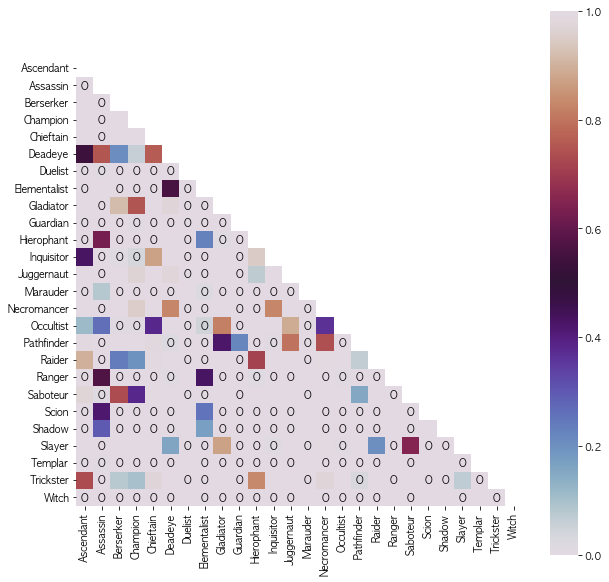

In [32]:
# Scheffe's test:
mask = np.zeros_like(df_sche)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (10, 10))

# 'O' mark: checking values which over significance level(0.05)
for i in range(df_sche.shape[1]):
    for j in range(df_sche.shape[0]):
        if (df_sche.iat[i, j] < 0.05) and (i<j) :
            plt.text(i+0.5, j+0.5, 'O', ha='center', va='center')

sns.heatmap(data = df_sche, mask = mask, cmap = 'twilight', square = True)
plt.show()

In [33]:
# root classes have low p-values with ascending classes.
df_sche[df_sche.columns.isin(rootclasses)]

,Ascendant,Assassin,Berserker,Champion,Chieftain,Deadeye,Duelist,Elementalist,Gladiator,Guardian,Hierophant,Inquisitor,Juggernaut,Marauder,Necromancer,Occultist,Pathfinder,Raider,Ranger,Saboteur,Scion,Shadow,Slayer,Templar,Trickster,Witch
Duelist,0.0000,0.0065,0.0000,0.0000,0.0000,0.0000,1.0000,0.0008,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,1.0000,0.0000,1.0000
Marauder,0.0000,0.0815,0.0000,0.0000,0.0000,0.0000,1.0000,0.0170,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,1.0000,0.0000,1.0000
Ranger,0.0000,0.5691,0.0000,0.0000,0.0000,0.0097,1.0000,0.4308,0.0000,0.0000,0.0113,0.0004,0.0000,1.0000,0.0000,0.0040,0.0000,0.0002,1.0000,0.0006,1.0000,1.0000,0.0000,1.0000,0.0002,1.0000
Scion,0.0000,0.4161,0.0000,0.0000,0.0000,0.0009,1.0000,0.2530,0.0000,0.0000,0.0008,0.0000,0.0000,1.0000,0.0000,0.0002,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,1.0000,0.0000,1.0000
Shadow,0.0000,0.2979,0.0000,0.0000,0.0000,0.0006,1.0000,0.1717,0.0000,0.0000,0.0006,0.0000,0.0000,1.0000,0.0000,0.0001,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,1.0000,0.0000,1.0000
Templar,0.0000,0.0021,0.0000,0.0000,0.0000,0.0000,1.0000,0.0002,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,1.0000,0.0000,1.0000
Witch,0.0000,0.0003,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,1.0000,0.0000,1.0000


In [34]:
# Whereas, root classes have high p-values with ascending classes.
df_sche[df_sche.columns.isin(rootclasses)][rootclasses]

,Duelist,Marauder,Ranger,Scion,Shadow,Templar,Witch
Duelist,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Marauder,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Ranger,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Scion,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Shadow,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Templar,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Witch,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


#### Scheffe test results:
I marked the p-values which is less than 0.05, and the classes
- Overall, there seems to be a difference. However, when the root classes were separated, there was a difference between them, and the results can be interpreted as having little difference between root classes.

- And plus, as you see, there are more number of marks in the Bonferroni result's heatmap. The Bonferroni method is stricter than Scheffe in this case. 

---
### ANOVA test (All classes) results  

The difference is mostly valid that includes root classes. 
So, one-way ANOVA and Kruskal_Wallis H test give very low p-values but it doesn't mean that the level has a markable relation with classes. Rather, the level has a relation to the class state, like after completing the Lord's Labyrinth or not.


### 5-2-2. ANOVA test (without _root classes_)
We could see there is a difference between class states certainly.  

So I progressed in analyzing without root classes like the way correlation analysis above.  

#### 5-2-2-1.  Average level

In [35]:
df_dead_ac = df_dead.loc[~df_dead['class'].isin(rootclasses)]
df_dead_ac.groupby('class')[['level']].describe()

level                                                        \
                  count     mean      std      min      25%      50%      75%   
class                                                                           
Ascendant     1380.0000  81.5486  12.8000  53.0000  71.0000  89.0000  91.0000   
Assassin       225.0000  72.4044  13.3838  53.0000  59.0000  71.0000  88.0000   
Berserker     2621.0000  81.9103  12.1472  53.0000  72.0000  89.0000  91.0000   
Champion       509.0000  83.2161  11.3075  53.0000  75.0000  89.0000  91.0000   
Chieftain      913.0000  81.3450  12.1997  53.0000  70.0000  89.0000  91.0000   
Deadeye        269.0000  77.4721  14.6635  53.0000  62.0000  83.0000  90.0000   
Elementalist   442.0000  72.7805  13.3096  53.0000  60.0000  71.0000  89.0000   
Gladiator     2097.0000  80.4425  12.7801  53.0000  70.0000  87.0000  91.0000   
Guardian       448.0000  88.8504   9.6724  53.0000  90.0000  91.0000  94.0000   
Hierophant     755.0000  76.8940  12.5021  53.0000  67.0000  76.0000  89.0000   
Inquisitor    1306.0000  79.0972  12.9534  53.0000  68.0000  84.0000  90.0000   
Juggernaut     881.0000  80.6390  12.2881  53.0000  70.0000  86.0000  91.0000   
Necromancer   2712.0000  80.9071  12.7378  53.0000  70.0000  88.5000  91.0000   
Occultist      523.0000  77.7992  13.6312  53.0000  67.0000  79.0000  90.5000   
Pathfinder     373.0000  84.0214  12.9062  53.0000  76.0000  90.0000  92.0000   
Raider        1216.0000  79.5378  13.7679  53.0000  68.0000  89.0000  91.0000   
Saboteur       483.0000  79.1097  13.2935  53.0000  68.0000  84.0000  91.0000   
Slayer        1825.0000  82.1096  11.9417  53.0000  72.0000  89.0000  91.0000   
Trickster     1282.0000  79.3549  12.8341  53.0000  69.0000  84.0000  90.0000   

                        
                   max  
class                   
Ascendant     100.0000  
Assassin       94.0000  
Berserker     100.0000  
Champion       99.0000  
Chieftain      99.0000  
Deadeye        98.0000  
Elementalist  100.0000  
Gladiator     100.0000  
Guardian      100.0000  
Hierophant     98.0000  
Inquisitor    100.0000  
Juggernaut     99.0000  
Necromancer   100.0000  
Occultist     100.0000  
Pathfinder     98.0000  
Raider        100.0000  
Saboteur      100.0000  
Slayer        100.0000  
Trickster     100.0000

#### 5-2-2-2. Boxplot by class
Get a boxplot and compare their average. 

In [36]:
# data division
# make a each classes "array" for repeatation
df_dead_ac.sort_values(['class'], inplace = True)
list_class_ac = df_dead_ac['class'].unique()

# list_level = []
for c in list_class_ac:
    condition = (df_dead_ac['class'] == c)
    df_bin = df_dead_ac.loc[condition]
    globals()["ar_{}".format(c)] = np.array(df_bin['level'])
#     list_level_ac.append(globals()["ar_{}".format(c)])

# make a variate list: Actually, this can't function...
# so we make a list composed of the above variable based on this list
list_level_ac = []
for c in list_class_ac:
    d = 'ar_' + c
    list_level_ac.append(d)

len(list_level_ac)

/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_65008/3438076092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dead_ac.sort_values(['class'], inplace = True)


19

[ar_Ascendant, ar_Assassin, ar_Berserker, ar_Champion, ar_Chieftain, ar_Deadeye, ar_Elementalist, ar_Gladiator, ar_Guardian, ar_Hierophant, ar_Inquisitor, ar_Juggernaut, ar_Necromancer, ar_Occultist, ar_Pathfinder, ar_Raider, ar_Saboteur, ar_Slayer, ar_Trickster]

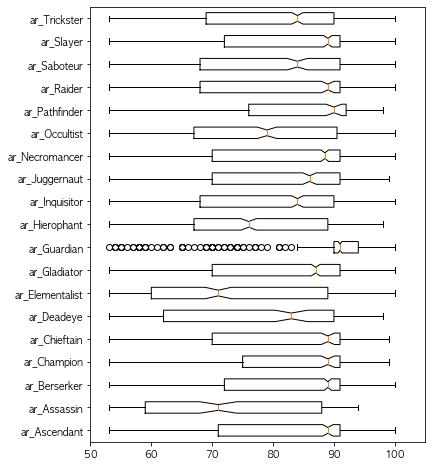

In [37]:
# boxplot
plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (6, 8)
plt.boxplot([ar_Ascendant, ar_Assassin, ar_Berserker, ar_Champion, ar_Chieftain, 
             ar_Deadeye, ar_Elementalist, ar_Gladiator, ar_Guardian, ar_Hierophant, 
             ar_Inquisitor, ar_Juggernaut, ar_Necromancer, ar_Occultist, ar_Pathfinder, 
             ar_Raider, ar_Saboteur, ar_Slayer, ar_Trickster], notch = True, vert=False,)
plt.xlim(50, 105)
plt.yticks(range(1, len(list_level_ac)+1), list_level_ac)
plt.show()

Many boxes are more similar each other than previous box plot(include _root classes_). While, `Guardian`'s level is not evenly distributed.  

#### 5-2-2-3. ANOVA

#### (1) Normality and skewness test: Shapiro-wilk test 

Do the same test, Shapiro-wilk test and skewness test.

In [38]:
list_level_ac = [ar_Ascendant, ar_Assassin, ar_Berserker, ar_Champion, ar_Chieftain, ar_Deadeye, ar_Elementalist, ar_Gladiator, ar_Guardian, ar_Hierophant, ar_Inquisitor, ar_Juggernaut, ar_Necromancer, ar_Occultist, ar_Pathfinder, ar_Raider, ar_Saboteur, ar_Slayer, ar_Trickster]

In [39]:
from scipy.stats import *
for cl, array in zip(list_class_ac, list_level_ac):
    print("# == {} Shapiro-wilk test ==".format(cl))
    print(shapiro(array))
    print("Skewness: {}".format(abs(stats.skew(array, bias = False))))
    if shapiro(array)[1] > 0.05:
        print("> Normality satisfied")
    if abs(stats.skew(array, bias = False)) > 2:
        print("> Skewness is over")
    print('\n')

# == Ascendant Shapiro-wilk test ==
ShapiroResult(statistic=0.8464069366455078, pvalue=1.406005808364913e-34)
Skewness: 0.7893670910990487


# == Assassin Shapiro-wilk test ==
ShapiroResult(statistic=0.9036740064620972, pvalue=7.442096938703457e-11)
Skewness: 0.1244514503420714


# == Berserker Shapiro-wilk test ==
ShapiroResult(statistic=0.8378379344940186, pvalue=1.401298464324817e-45)
Skewness: 0.915622629806766


# == Champion Shapiro-wilk test ==
ShapiroResult(statistic=0.8304262161254883, pvalue=7.788036228770405e-23)
Skewness: 1.0953560032842702


# == Chieftain Shapiro-wilk test ==
ShapiroResult(statistic=0.8603966236114502, pvalue=1.0740052335092418e-27)
Skewness: 0.7549078959756601


# == Deadeye Shapiro-wilk test ==
ShapiroResult(statistic=0.8607589602470398, pvalue=7.343571517754496e-15)
Skewness: 0.3566468145186242


# == Elementalist Shapiro-wilk test ==
ShapiroResult(statistic=0.9213810563087463, pvalue=1.9562258104090062e-14)
Skewness: 0.1957251199150377


# == Gladiato

/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_65008/4171972888.py:5: DeprecationWarning: Please use `skew` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  print("Skewness: {}".format(abs(stats.skew(array, bias = False))))
/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_65008/4171972888.py:8: DeprecationWarning: Please use `skew` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  if abs(stats.skew(array, bias = False)) > 2:


#### Normality test results
Only `Guardian` wasn't satisfying the skewness test. (I think it's because of the data distribution in `Guardian`.)

#### (2) Equal-Variance test

(Same as 5-2-2-3.)
I tested by two test methods, Levene and Fligner-Killeen.  
- Bartlett test which is a popular method must be normality in data, and the Levene test is less sensitive to normality.   
- And the Fligner-Killeen test, it is said that some nonparametric tests do not correlate with the size or probability distribution of the sample.  

In [40]:
levene(ar_Ascendant, ar_Assassin, ar_Berserker, ar_Champion, ar_Chieftain, ar_Deadeye, ar_Elementalist, ar_Gladiator, ar_Guardian, ar_Hierophant, ar_Inquisitor, ar_Juggernaut, ar_Necromancer, ar_Occultist, ar_Pathfinder, ar_Raider, ar_Saboteur, ar_Slayer, ar_Trickster)

LeveneResult(statistic=19.50933992619784, pvalue=5.140670860355577e-63)

In [41]:
fligner(ar_Ascendant, ar_Assassin, ar_Berserker, ar_Champion, ar_Chieftain, ar_Deadeye, ar_Elementalist, ar_Gladiator, ar_Guardian, ar_Hierophant, ar_Inquisitor, ar_Juggernaut, ar_Necromancer, ar_Occultist, ar_Pathfinder, ar_Raider, ar_Saboteur, ar_Slayer, ar_Trickster)

FlignerResult(statistic=426.9406872025966, pvalue=2.1711734879244195e-79)

#### Equal-Variance test results

All _ascending class_'s data satisfied equal variancy.

#### (3) One-way ANOVA 


In [42]:
f_oneway(ar_Ascendant, ar_Assassin, ar_Berserker, ar_Champion, ar_Chieftain, ar_Deadeye, ar_Elementalist, ar_Gladiator, ar_Guardian, ar_Hierophant, ar_Inquisitor, ar_Juggernaut, ar_Necromancer, ar_Occultist, ar_Pathfinder, ar_Raider, ar_Saboteur, ar_Slayer, ar_Trickster)

F_onewayResult(statistic=40.279711833420265, pvalue=1.1827777562413295e-139)

#### One-way ANOVA results
- The p-value is under 0.05 and it could be said that there're meaningful differences between all _ascending class_ levels.  
- But the statistic is discrimed markedly, and the p-value is little rised from `pvalue=2.38182378124225e-310`.

And, as the same above(All classes), the level data didn't satisfy normality, so I added the non-parametric tests, the Kruskal-Wallis H test.  

#### (4) Kruskal-Wallis H test

In [43]:
kruskal(ar_Ascendant, ar_Assassin, ar_Berserker, ar_Champion, ar_Chieftain, ar_Deadeye, ar_Elementalist, ar_Gladiator, ar_Guardian, ar_Hierophant, ar_Inquisitor, ar_Juggernaut, ar_Necromancer, ar_Occultist, ar_Pathfinder, ar_Raider, ar_Saboteur, ar_Slayer, ar_Trickster)

KruskalResult(statistic=785.4197796362981, pvalue=4.020047495113338e-155)

#### Kruskal_Wallis H test results

The p-value is under 0.05 so it could be said that there're differences between ascending class' levels.  

But the p-value is remarkably bigger (like One-way ANOVA results) than the results from all classes. (`3.928809290642803e-275`) I can't imagine how big the gap size is.  

(We already know, `Guardian`, but) let's uncover what classes are different from other classes.  

#### (5) Post-hoc 1 : Bonferroni

_this contents writing is the same as above Bonferroni, so you could pass this part._  

    The number of samples is different in each class, so I choose Bonferroni's test and Scheffe's test.  

    This is because it can be used in both parametric and non-parametric methods, and can be used even if the number of samples is different.  

    However, the more comparison groups, the weaker the power in Bonferroni's, so a strict method of the Scheffe test will also be added.

In [44]:
from statsmodels.sandbox.stats.multicomp import MultiComparison
comp = MultiComparison(df_dead_ac['level'], df_dead_ac['class'])
tb2, a1, a2 = comp.allpairtest(stats.ttest_ind, method = 'bonf')

/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_65008/3650526169.py:3: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  tb2, a1, a2 = comp.allpairtest(stats.ttest_ind, method = 'bonf')


In [45]:
# save the `statsmodels.iolib.table.SimpleTable` type result to csv
with open('/Users/Angela/Desktop/Personal/toy3_POE_kaggle/tb2.csv','w') as fh:
    fh.write(tb2.as_csv())

# call the info of the results, 3 lines.
fh2 = open('/Users/Angela/Desktop/Personal/toy3_POE_kaggle/tb2.csv', 'r')
for i in range(3):
    line = fh2.readline()
    print(line)
    pass
fh2.close()

# load the data from csv file, except the result info lines.
# the columns have 'space' because of the table form previous itself
# alias: df_bonftmp -> df_bonfactmp
df_bonfactmp = pd.read_csv("tb2.csv", header = 3)
df_bonfactmp.columns = columns = ['group1', 'group2', 'stat', 'pval', 'pval_corr', 'reject']

# reject column data is object type including 'Mysterious space'.
# array(['True  ', 'False '], dtype=object)
# correct the data to 1 or 0
df_bonfactmp.loc[df_bonfactmp['reject']=='True  ', 'reject'] = 1
df_bonfactmp.loc[df_bonfactmp['reject']=='False ', 'reject'] = 0

# and group1 and group2 columns have 'Mysterious Space Format' too, so edit it.
df_bonfactmp['group1'] = df_bonfactmp['group1'].str.replace(" ", "")
df_bonfactmp['group2'] = df_bonfactmp['group2'].str.replace(" ", "")

Test Multiple Comparison ttest_ind 

FWER=0.05 method=bonf

alphacSidak=0.00, alphacBonf=0.000



In [46]:
# check the reject 'True' and descending order the p-value
# (p-value < 0.05, the average difference has meaning.)
df_bonfactmp.loc[df_bonfactmp['reject']==1].sort_values('pval', ascending = False).head(10)

,group1,group2,stat,pval,pval_corr,reject
79,Chieftain,Trickster,3.6548,0.0003,0.0451,1
126,Hierophant,Inquisitor,-3.7678,0.0002,0.0290,1
58,Champion,Juggernaut,3.8772,0.0001,0.0189,1
144,Juggernaut,Occultist,4.0177,0.0001,0.0106,1
39,Berserker,Gladiator,4.0296,0.0001,0.0097,1
14,Ascendant,Raider,3.8547,0.0001,0.0203,1
59,Champion,Necromancer,3.8171,0.0001,0.0235,1
21,Assassin,Deadeye,-3.9796,0.0001,0.0136,1
110,Gladiator,Occultist,4.1748,0.0000,0.0053,1
105,Gladiator,Guardian,-13.1432,0.0000,0.0000,1


There's not _root classes_, so it will be `nan`.

In [47]:
rootclasses = ['Duelist', 'Marauder', 'Ranger', 'Scion', 'Shadow', 'Templar', 'Witch']
root_ratio = df_bonfactmp.loc[(df_bonfactmp['group1'].isin(rootclasses))|
                            (df_bonfactmp['group2'].isin(rootclasses))]
root_ratio['reject'].mean()

nan

And let's check the _ascending classes_'s reject ratio.

In [48]:
# this is same with `df_bonfactmp['reject'].mean()`
asce_ratio = df_bonfactmp.loc[~( (df_bonfactmp['group1'].isin(rootclasses))|
                            (df_bonfactmp['group2'].isin(rootclasses)) )]
asce_ratio['reject'].mean()

0.631578947368421

The ratio is bigger than the one(0.6198830409356725) of all classes' Bonferroni results, but it is almost the same level.  
We can see that **the meaningful level difference in the level between each class is still obvious.**

We also check by visualizing the difference.

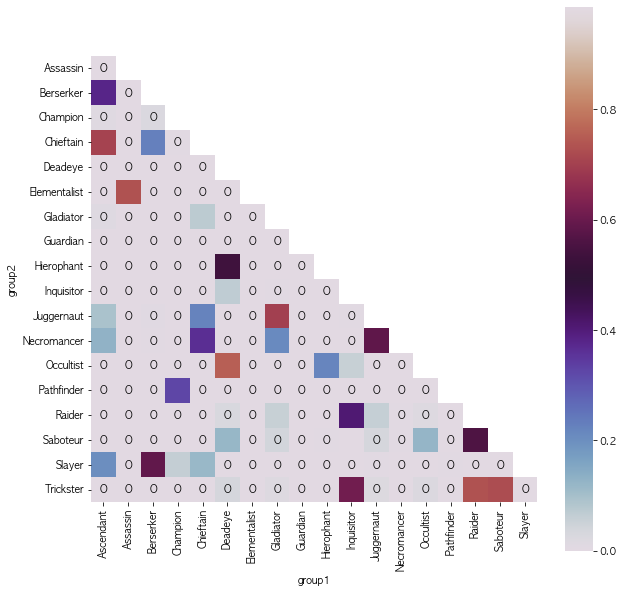

In [49]:
# Bonferroni's test
df_bonfheat = df_bonfactmp.pivot_table(values = 'pval', 
                                     index = 'group1', columns = 'group2').T
# # It doesn't need to mask (np.nan are already there)
# mask = np.zeros_like(df_sche)
# mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (10, 10))

# 'O' mark: checking values which over significance level(0.05)
for i in range(df_bonfheat.shape[1]):
    for j in range(df_bonfheat.shape[0]):
        if (df_bonfheat.iat[j, i] < 0.05):
            plt.text(i+0.5, j+0.5, 'O', ha='center', va='center')

sns.heatmap(data = df_bonfheat, cmap = 'twilight', square = True)
plt.show()

Remind the reason why we do the test without _root class_, 
        
    The `reject` result is difficult to explain easily because it is too large to compare the two of them.  

    And I compared the reject ratio between when the class is 'root classes' and 'ascendancy classes'. (Among the two ratios, if one has a different markedly, thinking by dividing 'root class' and 'ascendancy class' is valid.)  
    The gap between the two reject ratios isn't little.  
    This clearly shows that it can be useful to think of _root class_ and _ascending class_ separately.  

I thought the level difference would be significant because of the 'root class'(with the various reasons why _root classes_ are in Hardcore mode), but it was half right and half wrong.  

As this test results, it seems that there were quite a few differences between the _ascending classes_, too.

So I changed my mind to consider that class and level are related.

Let's do Scheffe's test.

#### (6) Post-hoc 2 : Scheffe 

In [50]:
import scikit_posthocs as sp
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', '{: .4f}'.format)
df_sche_ac = sp.posthoc_scheffe(df_dead_ac, val_col = 'level', group_col = 'class')
df_sche_ac

,Ascendant,Assassin,Berserker,Champion,Chieftain,Deadeye,Elementalist,Gladiator,Guardian,Hierophant,Inquisitor,Juggernaut,Necromancer,Occultist,Pathfinder,Raider,Saboteur,Slayer,Trickster
Ascendant,1.0000,0.0000,1.0000,0.9938,1.0000,0.1739,0.0000,0.9944,0.0000,0.0000,0.1176,1.0000,1.0000,0.0149,0.8830,0.5657,0.7708,1.0000,0.3301
Assassin,0.0000,1.0000,0.0000,0.0000,0.0000,0.3485,1.0000,0.0000,0.0000,0.2363,0.0000,0.0000,0.0000,0.0522,0.0000,0.0000,0.0007,0.0000,0.0000
Berserker,1.0000,0.0000,1.0000,0.9994,1.0000,0.0363,0.0000,0.6110,0.0000,0.0000,0.0007,0.9925,0.9718,0.0003,0.9568,0.0448,0.3298,1.0000,0.0088
Champion,0.9938,0.0000,0.9994,1.0000,0.9886,0.0063,0.0000,0.3469,0.0002,0.0000,0.0029,0.7652,0.7076,0.0002,1.0000,0.0335,0.0954,1.0000,0.0124
Chieftain,1.0000,0.0000,1.0000,0.9886,1.0000,0.3594,0.0000,0.9999,0.0000,0.0000,0.5216,1.0000,1.0000,0.0952,0.8526,0.9075,0.9352,1.0000,0.7770
Deadeye,0.1739,0.3485,0.0363,0.0063,0.3594,1.0000,0.1878,0.7802,0.0000,1.0000,0.9999,0.7940,0.4489,1.0000,0.0011,0.9966,1.0000,0.0245,0.9989
Elementalist,0.0000,1.0000,0.0000,0.0000,0.0000,0.1878,1.0000,0.0000,0.0000,0.0419,0.0000,0.0000,0.0000,0.0041,0.0000,0.0000,0.0000,0.0000,0.0000
Gladiator,0.9944,0.0000,0.6110,0.3469,0.9999,0.7802,0.0000,1.0000,0.0000,0.0006,0.9566,1.0000,1.0000,0.4337,0.1136,0.9998,0.9996,0.5230,0.9966
Guardian,0.0000,0.0000,0.0000,0.0002,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0400,0.0000,0.0000,0.0000,0.0000
Hierophant,0.0000,0.2363,0.0000,0.0000,0.0000,1.0000,0.0419,0.0006,0.0000,1.0000,0.6919,0.0076,0.0000,1.0000,0.0000,0.3102,0.9581,0.0000,0.4530


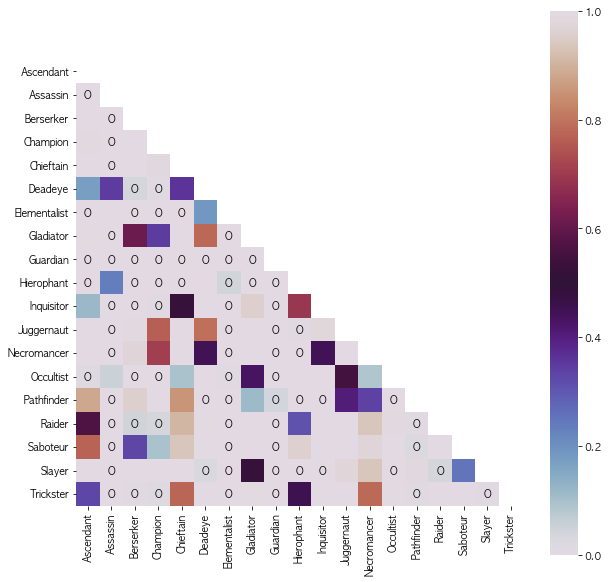

In [51]:
# Scheffe's test:
mask = np.zeros_like(df_sche_ac)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (10, 10))

# 'O' mark: checking values which over significance level(0.05)
for i in range(df_sche_ac.shape[1]):
    for j in range(df_sche_ac.shape[0]):
        if (df_sche_ac.iat[i, j] < 0.05) and (i<j) :
            plt.text(i+0.5, j+0.5, 'O', ha='center', va='center')

sns.heatmap(data = df_sche_ac, mask = mask, cmap = 'twilight', square = True)
plt.show()

#### Scheffe test results:
I marked the p-values which is less than 0.05, and the classes.  
Some classes are markable, Elementalist, Guardian, Heropahnt. They have many 'O' marks. In other words, their level values are quite different from the other classes.  

### result2:

There was a meaningful level difference between classes.  
It's caused by the class system in the game, especially changing the class for ascendancy classes which can use more skill points and following stats.  

Resultingly, the most apparent difference was between _root class_ and _ascending class_, and secondly, the difference was also meaningful among  _ascending classes_.


And I think dividing class to some clusters makes the problem(about _root class_ and _ascending class_) simple. Next chapter is it.

## 5-3. tying up them by _root class_

In my opinion, considering the degree of freedom, it doesn't matter if you combine their classes with the chosen 'stat' like strength, dexterity, or intelligence. Because each _ascending class_ is advanced from their _root class_ (which is divided by stats).  
Therefore, it would be fun to use the data from the _root class_ as well and compare all classes with the classes before choosing the _ascending classes_. Please check below. 

In [52]:
# Clustering ascending classes into root class
# One stat clusters
M = ['Marauder', 'Juggernaut', 'Berserker', 'Chieftain'] # Strength; Marauder
W = ['Witch', 'Necromancer', 'Elementalist', 'Occultist'] # Intelligence; Witch
R = ['Ranger', 'Raider', 'Deadeye', 'Pathfinder'] # Dexterity; Ranger

# Two stats clusters
D = ['Duelist', 'Slayer', 'Gladiator', 'Champion'] # Strength, Dexterity; Duelist
S = ['Shadow', 'Assassin', 'Saboteur', 'Trickster'] # Dexterity, Intelligence; Shadow
T = ['Templar', 'Inquisitor', 'Hierophant', 'Guardian'] # Intelligence, Strength; Templar

# Three stats clusters
Sc = ['Scion', 'Ascendant'] # Strength, Dexterity, Intelligence; Scion

# Making a column; df_dead['root']
df_dead.loc[df_dead['class'].isin(M), 'root'] = 'M'
df_dead.loc[df_dead['class'].isin(W), 'root'] = 'W'
df_dead.loc[df_dead['class'].isin(R), 'root'] = 'R'

df_dead.loc[df_dead['class'].isin(D), 'root'] = 'D'
df_dead.loc[df_dead['class'].isin(S), 'root'] = 'S'
df_dead.loc[df_dead['class'].isin(T), 'root'] = 'T'

df_dead.loc[df_dead['class'].isin(Sc), 'root'] = 'Sc'

In [53]:
# checking
df_dead['root'].unique()

array(['Sc', 'S', 'M', 'D', 'R', 'W', 'T'], dtype=object)

### 5-3-1. clusters' correlation

In [54]:
df_deads_rootonehot = pd.get_dummies(df_dead[['root', 'level']], drop_first = False)
pd.set_option('display.float_format', '{: .4f}'.format)
df_deads_rootonehot.corr()

,level,root_D,root_M,root_R,root_S,root_Sc,root_T,root_W
level,1.0000,0.0394,0.0422,-0.0082,-0.0504,0.0175,-0.0141,-0.0416
root_D,0.0394,1.0000,-0.2780,-0.1672,-0.1739,-0.1432,-0.1989,-0.2492
root_M,0.0422,-0.2780,1.0000,-0.1671,-0.1738,-0.1431,-0.1987,-0.2490
root_R,-0.0082,-0.1672,-0.1671,1.0000,-0.1045,-0.0861,-0.1195,-0.1498
root_S,-0.0504,-0.1739,-0.1738,-0.1045,1.0000,-0.0895,-0.1243,-0.1558
root_Sc,0.0175,-0.1432,-0.1431,-0.0861,-0.0895,1.0000,-0.1023,-0.1282
root_T,-0.0141,-0.1989,-0.1987,-0.1195,-0.1243,-0.1023,1.0000,-0.1781
root_W,-0.0416,-0.2492,-0.2490,-0.1498,-0.1558,-0.1282,-0.1781,1.0000


/Users/Angela/opt/anaconda3/envs/py3_8_5/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/Angela/opt/anaconda3/envs/py3_8_5/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


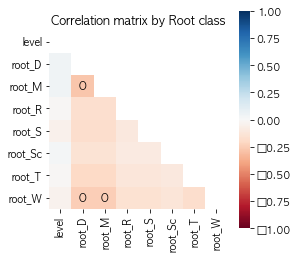

In [55]:
mask = np.zeros_like(df_deads_rootonehot.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (4, 4))

# 'O' mark: checking values which over significance level(0.05)
for i in range(df_deads_rootonehot.corr().shape[1]):
    for j in range(df_deads_rootonehot.corr().shape[0]):
        if (abs(df_deads_rootonehot.corr().iat[i, j]) > 0.2) and (i<j) :
            plt.text(i+0.5, j+0.5, 'O', ha='center', va='center')

sns.heatmap(data = df_deads_rootonehot.corr(), cmap = 'RdBu', mask=mask, square = True, vmin = -1, vmax = 1)
plt.title('Correlation matrix by Root class')
plt.show()

#### correlation heatmap result:

There's some correlation between Duelist and Marauder, between Marauder and Witch.  
Duelist and Marauder have a common in using strength stat.
And Marauder and Witch have a commonality in using only one stat, strength or Intelligence.  

We can conjecture that commonality in a class' stat can bring a relatively high correlation in level.  

### 5-3-2. ANOVA test (class cluster)
#### 5-3-2-1.  Average level
Compare each _root class_'s level by ANOVA.

In [56]:
pd.set_option('display.float_format', '{: .2f}'.format)
df_dead.groupby('root')[['level']].describe()

level                                                  
        count   mean    std    min    25%    50%    75%     max
root                                                           
D     4480.00  81.20  12.48  53.00  71.00  89.00  91.00  100.00
M     4475.00  81.27  12.36  53.00  71.00  89.00  91.00  100.00
R     1880.00  79.89  14.00  53.00  68.00  89.00  91.00  100.00
S     2018.00  78.24  13.30  53.00  68.00  81.00  90.00  100.00
Sc    1412.00  81.07  13.09  53.00  70.00  89.00  91.00  100.00
T     2561.00  79.74  13.21  53.00  69.00  86.00  91.00  100.00
W     3755.00  79.08  13.41  53.00  68.00  84.00  91.00  100.00

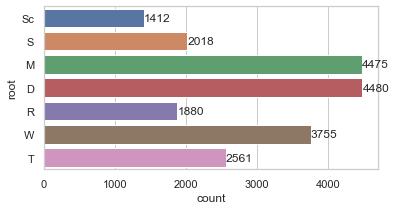

In [57]:
plt.rcParams["figure.figsize"] = (6, 3)
sns.set_theme(style = 'whitegrid')
ax = sns.countplot(y = 'root', data = df_dead, 
                   order = df_dead['root'].unique().sort())
for container in ax.containers:
    ax.bar_label(container)
plt.show()

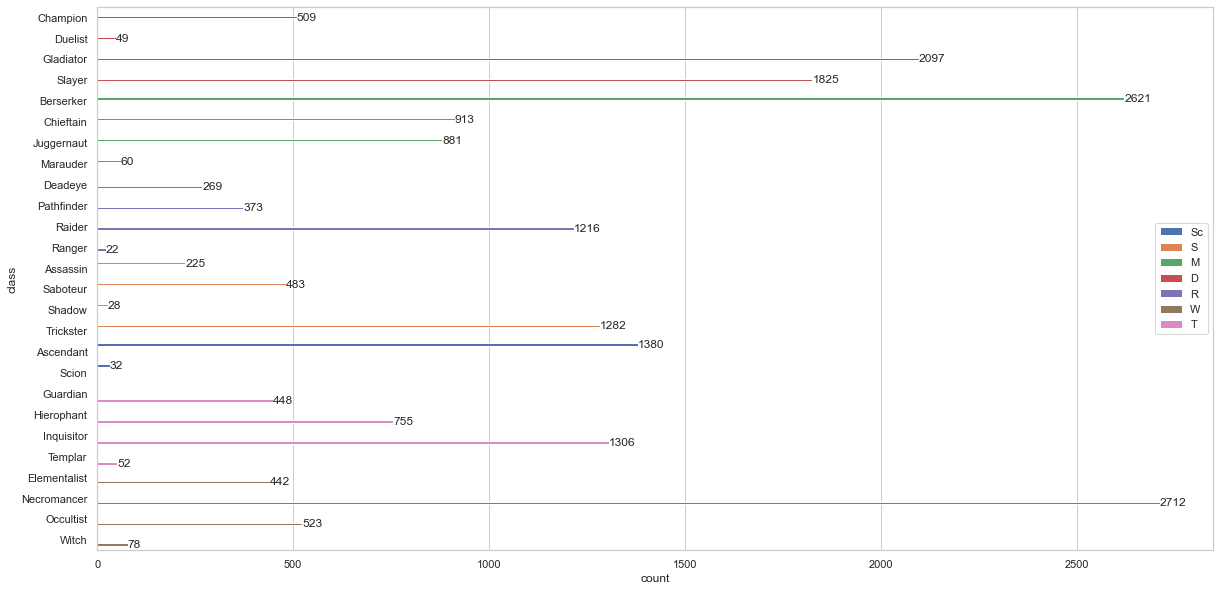

In [58]:
# container idea : reference code : 
# https://stackoverflow.com/questions/55104819/display-count-on-top-of-seaborn-barplot
plt.rcParams["figure.figsize"] = (20, 10)
sns.set_theme(style = 'whitegrid')
ax = sns.countplot(y = 'class', hue = 'root', data = df_dead, saturation = 1, 
                   order = df_dead.sort_values(['root', 'class'])['class'].unique())
plt.xticks()
for container in ax.containers:
    ax.bar_label(container)
plt.legend(loc = 'center right')
plt.show()

#### 5-3-2-2. Boxplot by class
Get a boxplot and compare their average. 

In [59]:
# data division
# make a each classes array for repeatation
df_dead.sort_values(['root'], inplace = True)
list_class_r = df_dead['root'].unique()

# list_level_r = []
for c in list_class_r:
    condition = (df_dead['root'] == c)
    df_bin = df_dead.loc[condition]
    globals()["root_{}".format(c)] = np.array(df_bin['level'])
#     list_level.append(globals()["ar_{}".format(c)])

# make a variate list
list_level_r = []
for c in list_class_r:
    d = 'root_' + c
    list_level_r.append(d)

In [60]:
list_level_r

['root_D', 'root_M', 'root_R', 'root_S', 'root_Sc', 'root_T', 'root_W']

In [61]:
list_level_r = [root_D, root_M, root_R, root_S, root_Sc, root_T, root_W]

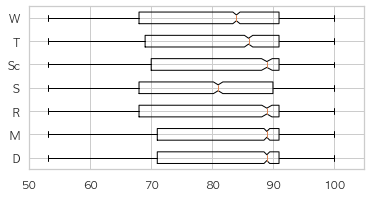

In [62]:
plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (6, 3)
plt.boxplot([root_D, root_M, root_R, root_S, root_Sc, root_T, root_W], notch = True, vert=False)
plt.xlim(50, 105)
plt.yticks(range(1, len(list_level_r)+1), list_class_r)
plt.show()

You can see Shadow's level median is a little low than others as the described table (81.00).  
But the level's distribution is quite similar.  

#### 5-3-2-3. ANOVA

#### (1) Normality test: Shapiro-wilk test 

The number of samples are over 30 all, so we can use Kolmogorov-Smirnov test but I use Shapiro-wilk for consistency.
 이기 때문에 위처럼 p-값이 낮다면 귀무가설이 기각되어 잔차가 정규적으로 분포해있지 않다고 결론을 내리게됩니다.

In [63]:
from scipy.stats import *
for cl, array in zip(list_class_r, list_level_r):
    print("# == {} Shapiro-wilk test ==".format(cl))
    print(shapiro(array), '\n')
    if shapiro(array)[1] > 0.05:
        print("> Normality satisfied")

# == D Shapiro-wilk test ==
ShapiroResult(statistic=0.8610715270042419, pvalue=0.0) 

# == M Shapiro-wilk test ==
ShapiroResult(statistic=0.8559562563896179, pvalue=0.0) 

# == R Shapiro-wilk test ==
ShapiroResult(statistic=0.8410778045654297, pvalue=8.112677329362096e-40) 

# == S Shapiro-wilk test ==
ShapiroResult(statistic=0.8958292603492737, pvalue=6.012082502464268e-35) 

# == Sc Shapiro-wilk test ==
ShapiroResult(statistic=0.8490917682647705, pvalue=1.1123332256015569e-34) 

# == T Shapiro-wilk test ==
ShapiroResult(statistic=0.8847988247871399, pvalue=4.627984360217714e-40) 

# == W Shapiro-wilk test ==
ShapiroResult(statistic=0.8884855508804321, pvalue=0.0) 



#### Normality test results
Any group doesn't satisfy normality. 

#### (2) Equal-Variance test
The below script is the same as the previous Equal-variance test.   

    I tested by two test methods, Levene and Fligner-Killeen. Bartlett test must be normality in data, and the Levene test is less sensitive to normality. And the Fligner-Killeen test, it is said that some nonparametric tests do not correlate with the size or probability distribution of the sample.  

In [64]:
levene(root_D, root_M, root_R, root_S, root_Sc, root_T, root_W)

LeveneResult(statistic=26.577259509578322, pvalue=1.030330931884292e-31)

In [65]:
fligner(root_D, root_M, root_R, root_S, root_Sc, root_T, root_W)

FlignerResult(statistic=236.78709722094757, pvalue=2.7245660220092474e-48)

#### Equal-Variance test results

All root class's satisfied equal variance.

#### (3) One-way ANOVA 


In [66]:
f_oneway(root_D, root_M, root_R, root_S, root_Sc, root_T, root_W)

F_onewayResult(statistic=23.578964385390943, pvalue=6.1547634459814315e-28)

In [67]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('level ~ C(root)', df_dead).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(root),6.00,23858.92,3976.49,23.58,0.00
Residual,20574.00,3469712.28,168.65,NaN,NaN


#### One-way ANOVA results
The p-value is under 0.05 and it could be said that there're differences between all class levels.  

And I noticed that the statistic is smaller than previous ANOVA statistics(all classes ANOVA statistic was `63.98606057045286`, and only _ascending classes_ ANOVA statistic was `40.279711833420265`.).  

Let's briefly check the statistic when we analysis only _root class_.

In [68]:
df_dead_root = df_dead.loc[df_dead['class'].isin(rootclasses)]

In [69]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('level ~ C(root)', df_dead_root).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(root),6.00,320.57,53.43,1.29,0.26
Residual,314.00,12963.60,41.29,NaN,NaN


많은 클래스를 비교할 수록 통계량이 커지는 것은 당연합니다. 그러나 예상과 맞게도, ascendancy 클래스와 root 클래스 각각만 두고 비교했을 때의 통계량이 적어지며, 클래스를 논하기 위해서는 그들을 따로 비교하는 것이 타당하다는 것을 알 수 있습니다. 
Path of Exile 게임 내에서 스탯에 따라 클래스가 갈리므로, 차라리 둘 모두를 각 스탯에 따라 클러스터로 묶어서 비교한 것이 많은 수의 샘플을 확보할 수 있다는 장점이 있을 수 있겠습니다.  

The more classes you compare, the larger the statistics are.  
However, as expected, the statistics are less when compared with only the _ascending classes_ and _root classes_, and it makes sense to compare them separately to discuss the classes.  
Since the classes are divided by 'stats' within the Path of Exile game, comparing both in clusters according to each stats might be rather to have the advantage of obtaining a large number of samples.  

And the data doesn't satisfy normality, so test it once more by Kruskal-Wallis H test.

#### (4) Kruskal-Wallis H test

In [70]:
kruskal(root_D, root_M, root_R, root_S, root_Sc, root_T, root_W)

KruskalResult(statistic=108.21689296656184, pvalue=4.814482244592165e-21)

#### Kruskal-Wallis H test results

The statistic said that the samples have difference, so I checked the correlation map is true.

#### (5) Post-hoc 1 : Bonferroni

In [71]:
from statsmodels.sandbox.stats.multicomp import MultiComparison
comp = MultiComparison(df_dead['level'], df_dead['root'])
tb3, a1, a2 = comp.allpairtest(stats.ttest_ind, method = 'bonf')

/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_65008/790554817.py:3: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  tb3, a1, a2 = comp.allpairtest(stats.ttest_ind, method = 'bonf')


In [72]:
# save the `statsmodels.iolib.table.SimpleTable` type result to csv
with open('/Users/Angela/Desktop/Personal/toy3_POE_kaggle/tb3.csv','w') as fh:
    fh.write(tb3.as_csv())

# call the info of the results, 3 lines.
fh2 = open('/Users/Angela/Desktop/Personal/toy3_POE_kaggle/tb3.csv', 'r')
for i in range(3):
    line = fh2.readline()
    print(line)
    pass
fh2.close()

# load the data from csv file, except the result info lines.
# the columns have 'space' because of the table form previous itself
# alias: df_bonftmp -> df_bonfactmp
df_bonfroottmp = pd.read_csv("tb3.csv", header = 3)
df_bonfroottmp.columns = columns = ['group1', 'group2', 'stat', 'pval', 'pval_corr', 'reject']

# reject column data is object type including 'Mysterious space'.
# array(['True  ', 'False '], dtype=object)
# correct the data to 1 or 0
df_bonfroottmp.loc[df_bonfroottmp['reject']=='True  ', 'reject'] = 1
df_bonfroottmp.loc[df_bonfroottmp['reject']=='False ', 'reject'] = 0

# and group1 and group2 columns have 'Mysterious Space Format' too, so edit it.
df_bonfroottmp['group1'] = df_bonfroottmp['group1'].str.replace(" ", "")
df_bonfroottmp['group2'] = df_bonfroottmp['group2'].str.replace(" ", "")

Test Multiple Comparison ttest_ind 

FWER=0.05 method=bonf

alphacSidak=0.00, alphacBonf=0.002



In [73]:
# check the reject 'True' and descending order the p-value
# (p-value < 0.05, the average difference has meaning.)
df_bonfroottmp.loc[df_bonfroottmp['reject']==1].sort_values('pval', ascending = False)

,group1,group2,stat,pval,pval_corr,reject
18,Sc,T,3.04,0.00,0.05,1
1,D,R,3.69,0.00,0.00,1
11,R,S,3.78,0.00,0.00,1
6,M,R,3.91,0.00,0.00,1
16,S,T,-3.81,0.00,0.00,1
2,D,S,8.67,0.00,0.00,1
4,D,T,4.63,0.00,0.00,1
5,D,W,7.42,0.00,0.00,1
7,M,S,8.93,0.00,0.00,1
9,M,T,4.88,0.00,0.00,1


And let's check the root's reject ratio.

In [74]:
df_bonfroottmp['reject'].mean()

0.6190476190476191

The reject ratio came out to a similar level as all classes' Bonferroni results(0.6198830409356725).  
And the result said that **the meaningful difference in the level between each _root class_ is still obvious.**

We also check by visualizing the difference.

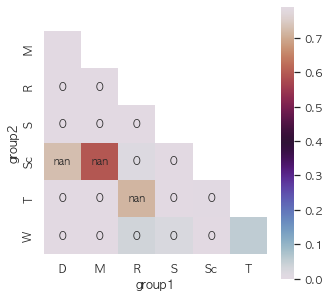

In [75]:
# Bonferroni's test
df_bonfheat = df_bonfroottmp.pivot_table(values = 'pval', 
                                     index = 'group1', columns = 'group2').T
# # It doesn't need to mask (np.nan are already there)
# mask = np.zeros_like(df_sche)
# mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (5, 5))

# 'O' mark: checking values which over significance level(0.05)
for i in range(df_bonfheat.shape[1]):
    for j in range(df_bonfheat.shape[0]):
        if (df_bonfheat.iat[j, i] < 0.05):
            plt.text(i+0.5, j+0.5, 'O', ha='center', va='center')
        elif i<j:
            plt.text(i+0.5, j+0.5, round(df_bonfheat.iat[i, j], 2), ha='center', va='center')


sns.heatmap(data = df_bonfheat, cmap = 'twilight', square = True)
plt.show()

#### Bonferroni test results:

As you see, between classes have meaningful differences observed.  
Especially Shadow looked like have a significant difference between all classes.  

Let's do Scheffe's test.

#### (6) Post-hoc 2 : Scheffe 

In [76]:
import scikit_posthocs as sp
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', '{: .4f}'.format)
df_sche_r = sp.posthoc_scheffe(df_dead, val_col = 'level', group_col = 'root')
df_sche_r

,D,M,R,S,Sc,T,W
D,1.0000,1.0000,0.0357,0.0000,1.0000,0.0021,0.0000
M,1.0000,1.0000,0.0205,0.0000,0.9997,0.0009,0.0000
R,0.0357,0.0205,1.0000,0.0153,0.3564,0.9999,0.5622
S,0.0000,0.0000,0.0153,1.0000,0.0000,0.0197,0.4787
Sc,1.0000,0.9997,0.3564,0.0000,1.0000,0.1468,0.0005
T,0.0021,0.0009,0.9999,0.0197,0.1468,1.0000,0.6881
W,0.0000,0.0000,0.5622,0.4787,0.0005,0.6881,1.0000


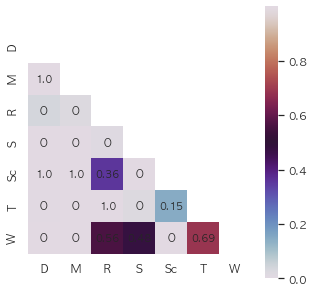

In [77]:
# Scheffe's test:
mask = np.zeros_like(df_sche_r)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (5, 5))

# 'O' mark: checking values which over significance level(0.05)
for i in range(df_sche_r.shape[1]):
    for j in range(df_sche_r.shape[0]):
        if (df_sche_r.iat[i, j] < 0.05) and (i<j) :
            plt.text(i+0.5, j+0.5, 'O', ha='center', va='center')
        elif i<j:
            plt.text(i+0.5, j+0.5, round(df_sche_r.iat[i, j], 2), ha='center', va='center')

sns.heatmap(data = df_sche_r, mask = mask, cmap = 'twilight', square = True)
plt.show()

#### Scheffe's test result:

Unexpectedly, there are less meaningful differences in Scheffe's test result. 

But it isn't changed that the classes have differences between themselves.  

### results3:

When even all classes are tied up by _root class_, differences are observed.  
As a result, we can tell some classes have a different level distribution from other classes.  


## 5-4. Q5's answer : YES

Finally, all classes analysis in dead characters levels data.  
It was confirmed that there was a difference no matter how the classes were divided. So I would say "Yes" to Question 5. As you see, all results said "Yes".

But I'm still wondering whether the observed difference from the level and the class has meaning or not. 
The reasons are these:
- two hardcore modes have solo play mode and multiplay mode.  
> each class has each job in the mode so it doesn't make sense that compares each roll.
- ranked characters(players) are expert enough.  
> especially the level data of _root classes_ does not represent much to this analysis especially.  

# After this project...

*Hooray! I finally ended up with my first toy project!*

After this project, I wrote some ideas from the perspective of a position working for a game company.  

#### Q1. A total number of players in each division, usage of each class in descending order: We can see in this part which classes are more popular on each mode.  
---
*More with...*
- \+ past game modes data(or time series data of rank): 
    - What differences with past data and is it related to the patch? 
    - Are they keeping the rank? How long, or since when?
- \+ total users' class preference: 
    - What difference between normal users and rankers in choosing a class? How much? Is it caused by difficulty or trained level? 
- \+ total users' class preference + skill and preference of equipment: 
    - Is an over-power class in there? 
    - Is there any combination that makes overperformance? 
- \+ skill and preference of equipment + specific numbers of classes' ability: 
    - In case of making a new season game mode(or altering the modes), is it guardable to users?


#### Q2. Some of the players streaming their game (twitch column). Do they play better than people, who does not?
---
*More with...*



#### Q3. Predict chance to be at top 30 in each division, if we are Necromancer. With and without stream.
---
*More with...*


#### Q4. Average number of finished challanges for each division, show division with highest and lowest average challanges.
---
*More with...*


#### Q5. Show dependency between level and class of died characters. Only for HC divisions.
---
*More with...*
